In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

bos = load_boston()

bdf = pd.DataFrame(data = bos.data, columns = bos.feature_names)
bdf['PRICE'] = bos.target

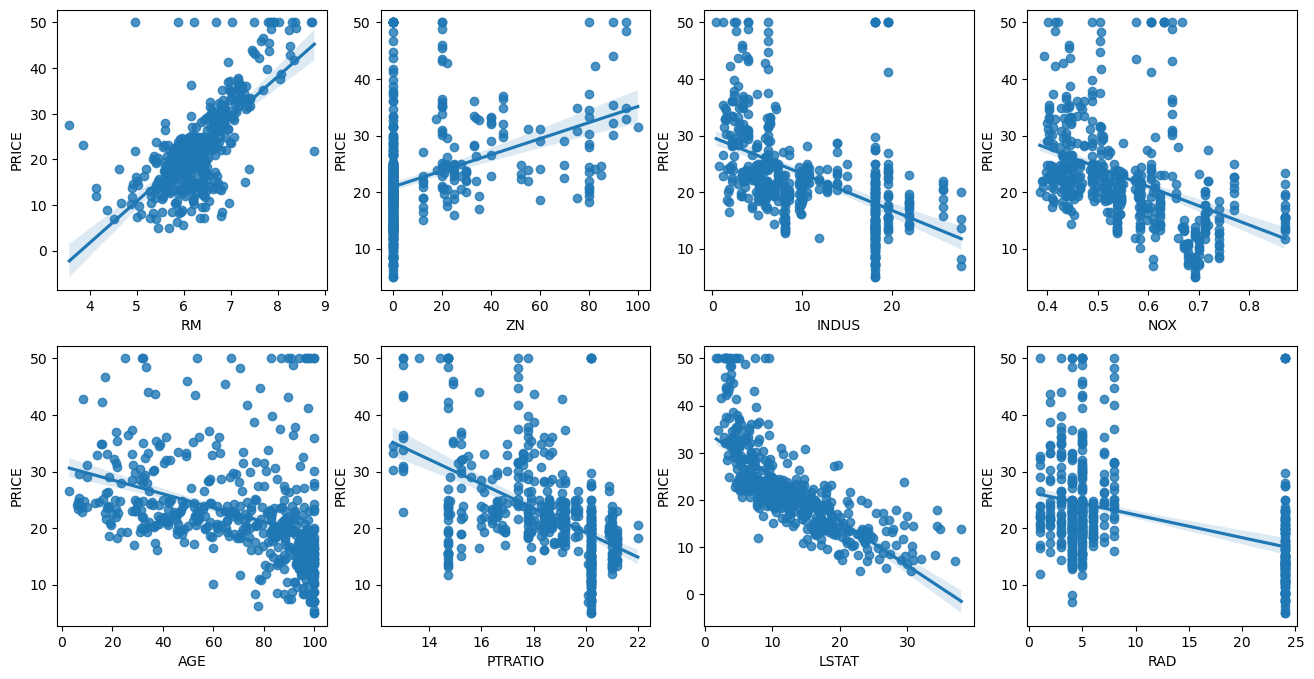

In [14]:
fig, axs = plt.subplots(figsize = (16, 8), nrows = 2, ncols = 4)

features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

for i, feature in enumerate(features):
    row = int(i / 4)
    col = i % 4
    sns.regplot(x = feature, y = 'PRICE', data = bdf, ax = axs[row][col])

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

feature_data = bdf.drop('PRICE', axis = 1)
target_data = bdf['PRICE']
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data,
                                                   test_size = 0.3, random_state = 156)
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print('MSE: {0: .4f}, RMSE: {1: .4f}'.format(mse, rmse))
print('r2score:', np.round(r2_score(y_test, pred), 4))
coef = pd.Series(data = np.round(lr.coef_, 1), index = feature_data.columns)
coef.sort_values(ascending = False)

nmse = cross_val_score(lr, feature_data, target_data, scoring = 'neg_mean_squared_error', cv = 5)
rnmse = np.sqrt(-1 * nmse)
anmse = np.mean(rnmse)

print(nmse)
print(rnmse)
print(anmse)

MSE:  17.2969, RMSE:  4.1590
r2score: 0.7572
[-12.46030057 -26.04862111 -33.07413798 -80.76237112 -33.31360656]
[3.52991509 5.10378498 5.75101191 8.9867887  5.77179405]
5.8286589462158345


In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

X = np.arange(4).reshape(2, 2)

def polynomial_func(X):
    y = 1 + 2 * X[:, 0] + 3 * X[:, 0]**2 + 4 * X[:, 1]**3
    return y

y = polynomial_func(X)
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
lr = LinearRegression()
lr.fit(poly_ftr, y)

pipe = Pipeline([('P', PolynomialFeatures(degree = 3)),
                ('lr', LinearRegression())])

pipe = pipe.fit(X, y)
print(pipe)
print(pipe.named_steps['lr'].coef_)
print(pipe.named_steps['P'])

<class 'sklearn.pipeline.Pipeline'>
Pipeline(steps=[('P', PolynomialFeatures(degree=3)),
                ('lr', LinearRegression())])
[0.         0.18018018 0.18018018 0.36036036 0.54054054 0.72072072
 0.72072072 1.08108108 1.62162162 2.34234234]
PolynomialFeatures(degree=3)


AttributeError: 'LinearRegression' object has no attribute 'predict_proba'